<a href="https://colab.research.google.com/github/blbaholo/Bone-Break-Classification-CNN-Model/blob/main/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, a bone break classification dataset is used to train a convolutional neural network (CNN) model to classify the type of bone fracture from bone images. Keras and Tensorflow are used to develop the model which is then evaluated using accuracy and loss plots.


**Objectives**

* Load and preprocess an image dataset.
* Build a simple CNN using TensorFlow/Keras.
* Train the CNN and evaluate its performance.
* Visualize model accuracy and loss.
* Perform predictions on test data.
* Data augmentation to prevent overfitting
* Transfer Learning with ResNet50

# Loading and Preprocessing data

In [ ]:
# Load necessary libraries

import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.models import Model
from tensorflow.keras.activations import softmax
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from PIL import Image

In [ ]:
# Load the dataset

def load_data(data_dir):
    images = []
    labels = []

    # Iterate through each fracture type directory
    for fracture_type in os.listdir(data_dir):
        fracture_dir = os.path.join(data_dir, fracture_type)

        # Check if it's a directory
        if os.path.isdir(fracture_dir):
            # Load training images
            train_dir = os.path.join(fracture_dir, "Train")
            for img_name in os.listdir(train_dir):
                img_path = os.path.join(train_dir, img_name)
                img = Image.open(img_path).convert("RGB")
                img = img.resize((224, 224))
                images.append(np.array(img))
                labels.append(fracture_type)


            # Load testing images
            test_dir = os.path.join(fracture_dir, "Test")
            for img_name in os.listdir(test_dir):
                img_path = os.path.join(test_dir, img_name)
                img = Image.open(img_path).convert("RGB")
                img = img.resize((224, 224))
                images.append(np.array(img))
                labels.append(fracture_type)

    return np.array(images), np.array(labels)


data_directory = "/content/drive/MyDrive/Bone-Break-Classification"
images, labels = load_data(data_directory)

print(f"Loaded {len(images)} images with {len(set(labels))} unique classes.")

Loaded 1129 images with 10 unique classes.


In [ ]:
# Split data into training and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)

# Normalizing pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

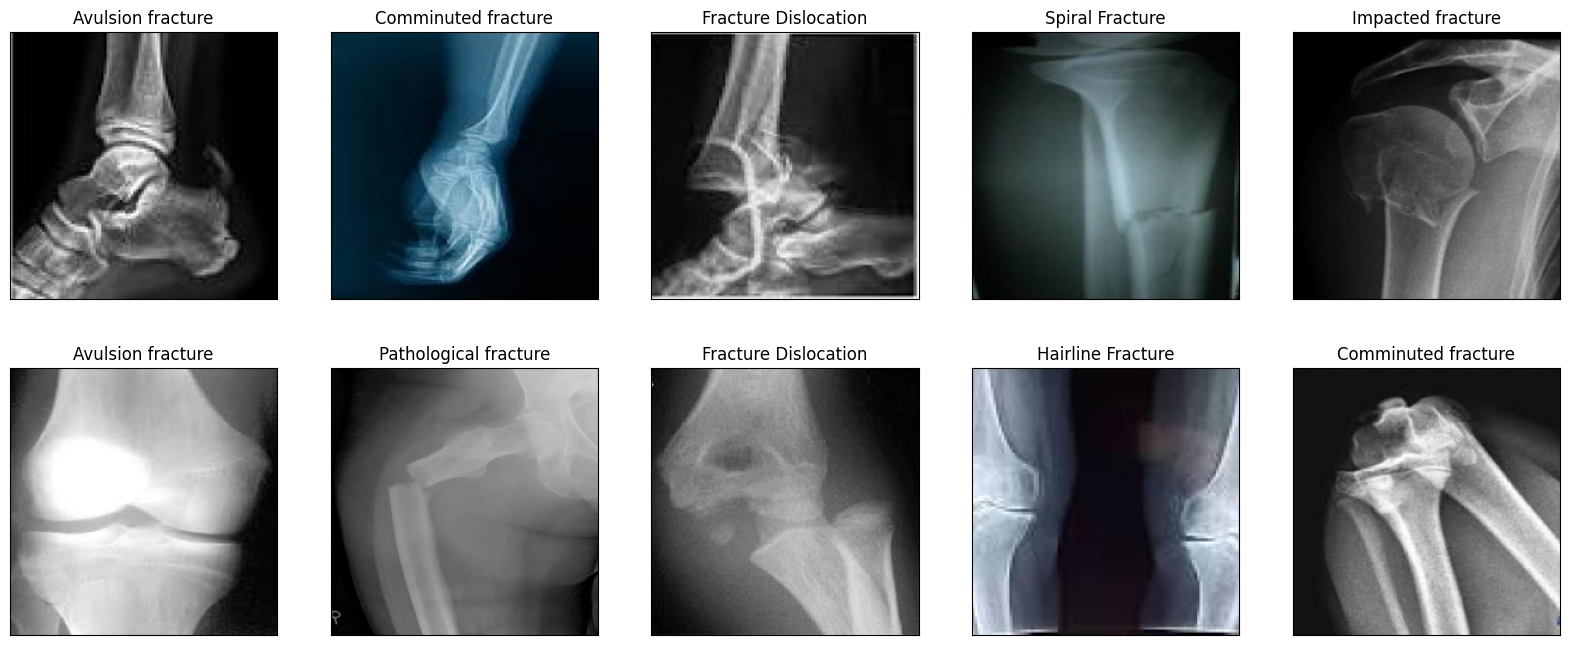

In [ ]:
# Plot bone images from each class
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i])
    ax.set_title(train_labels[i])
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [ ]:
# Convert categorical labels to numeric values
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Building the model

In [ ]:
# Create a sequential model
model = models.Sequential([
    # Specify input shape
    layers.Input(shape=(224, 224, 3)),

    # First 2D convolution layer with maxpooling
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Second 2D Conv layer with maxpooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third 2D Conv layer with maxpooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    # Flattening the output from last convolution layer
    layers.Flatten(),

    # First densely connected layer
    layers.Dense(64, activation='relu'),

    # Output layer with 10 classes
    layers.Dense(10, activation="softmax")
])

# Generate model summary of architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,825,930 (10.78 MB)

 Trainable params: 2,825,930 (10.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Removing code redunancy by creating function that trains the dataset for each model

def training_dataset():
  # Compiling the model
  model.compile(optimizer="Adam", loss=tf.keras.losses.SparseCategoricalCrossentropy, metrics=["accuracy"])

  # Training the model
  model_history = model.fit(train_images, train_labels_encoded, batch_size=32, epochs=10, validation_data=(test_images, test_labels_encoded), shuffle=True)

  return model_history

history = training_dataset()
history

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.1442 - loss: 2.3931 - val_accuracy: 0.1180 - val_loss: 2.2915
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.1766 - loss: 2.2460 - val_accuracy: 0.2153 - val_loss: 2.2415
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.3063 - loss: 2.0102 - val_accuracy: 0.2065 - val_loss: 2.3553
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.4517 - loss: 1.6344 - val_accuracy: 0.2330 - val_loss: 2.4785
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.5725 - loss: 1.3272 - val_accuracy: 0.2330 - val_loss: 3.3698
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.7099 - loss: 0.9018 - val_accuracy: 0.2714 - val_loss: 3.6913
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.8181 - loss: 0.6520 - val_accuracy: 0.2832 - val_loss: 4.9219
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8991 - loss: 0.3981 - val_accuracy: 0.3068 - val_lo

# Model Performance

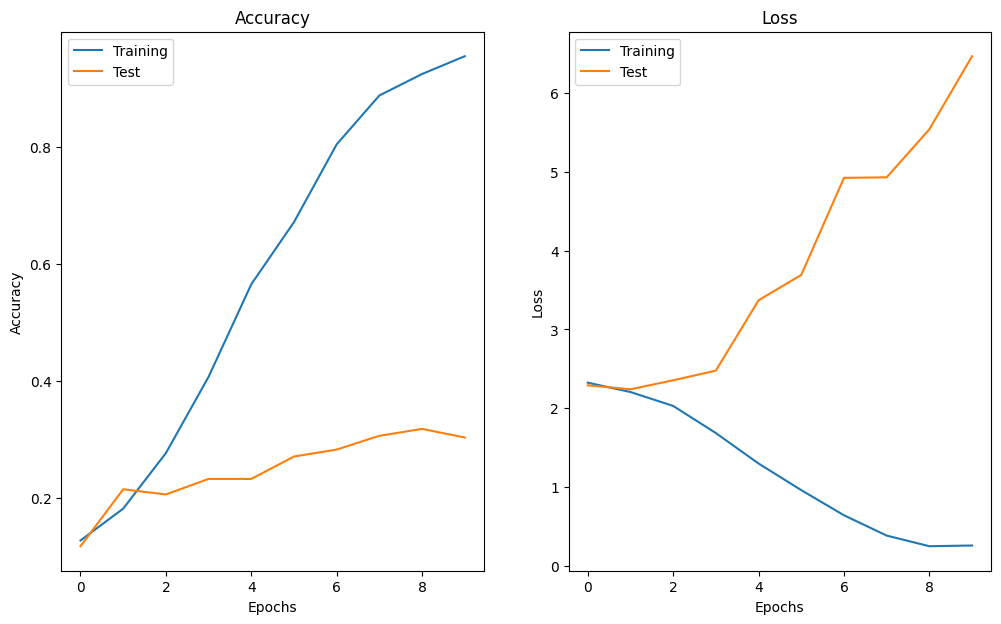

In [ ]:
# Removing code redunancy by creating function to plot the perfomance for each model

def plot_model_performance(model_history):
  # Plot accuracy and loss on training and test sets

  fig, axes = plt.subplots(1, 2, figsize=(12, 7))

  # Plot accuracy on training and validation sets
  axes[0].plot(model_history.history["accuracy"], label="Training Accuracy")
  axes[0].plot(model_history.history["val_accuracy"], label="Test Accuracy")
  axes[0].set_xlabel("Epochs")
  axes[0].set_ylabel("Accuracy")
  axes[0].legend(["Training", "Test"])
  axes[0].set_title("Accuracy")

  # Plot loss on trainig and test sets
  axes[1].plot(history.history["loss"], label="Training Loss")
  axes[1].plot(history.history["val_loss"], label="Test Loss")
  axes[1].set_xlabel("Epochs")
  axes[1].set_ylabel("Loss")
  axes[1].legend(["Training", "Test"])
  axes[1].set_title("Loss")

  plt.show()

plot_model_performance(history)

> Based on the accuracy and loss plots, it's evident that overfitting is happening because the training dataset has a much higher accuracy than the test dataset. This suggests that the model is struggling to make accurate predictions on new, unseen data. The loss plot also confirms this, showing a rapid increase in the test set loss value. To address this issue, the next step is to incorporate data augmentations. This will introduce variations and complexity in the training data, potentially improving the model's robustness and overall performance.

# Data Augmentation

In [ ]:
# Create a sequential model with data augmentions
augmented_model = models.Sequential([
    # Specify input shape
    layers.Input(shape=(224, 224, 3)),

    # Adding data augmentations
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),

    # First 2D convolution layer with maxpooling and regularization
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    # Second 2D Conv layer with maxpooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third 2D Conv layer with maxpooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flattening the output from last convolution layer
    layers.Flatten(),

    # First densely connected layer
    layers.Dense(64, activation='relu'),

    # Output layer with 10 classes
    layers.Dense(10, activation="softmax")
])

# Generate model summary of architecture
augmented_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,825,930 (10.78 MB)

 Trainable params: 2,825,930 (10.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training data augmented model
augmented_history = training_dataset()
augmented_history

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.9378 - loss: 0.2271 - val_accuracy: 0.3097 - val_loss: 8.5497
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9756 - loss: 0.0772 - val_accuracy: 0.2891 - val_loss: 7.7432
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9968 - loss: 0.0402 - val_accuracy: 0.3245 - val_loss: 8.5605
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9972 - loss: 0.0169 - val_accuracy: 0.3038 - val_loss: 9.6151
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9961 - loss: 0.0255 - val_accuracy: 0.3156 - val_loss: 7.8856
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.9889 - loss: 0.0598 - val_accuracy: 0.3097 - val_loss: 7.3337
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.9805 - loss: 0.0963 - val_accuracy: 0.2979 - val_loss: 7.7546
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9960 - loss: 0.0522 - val_accuracy: 0.3127 - val_lo

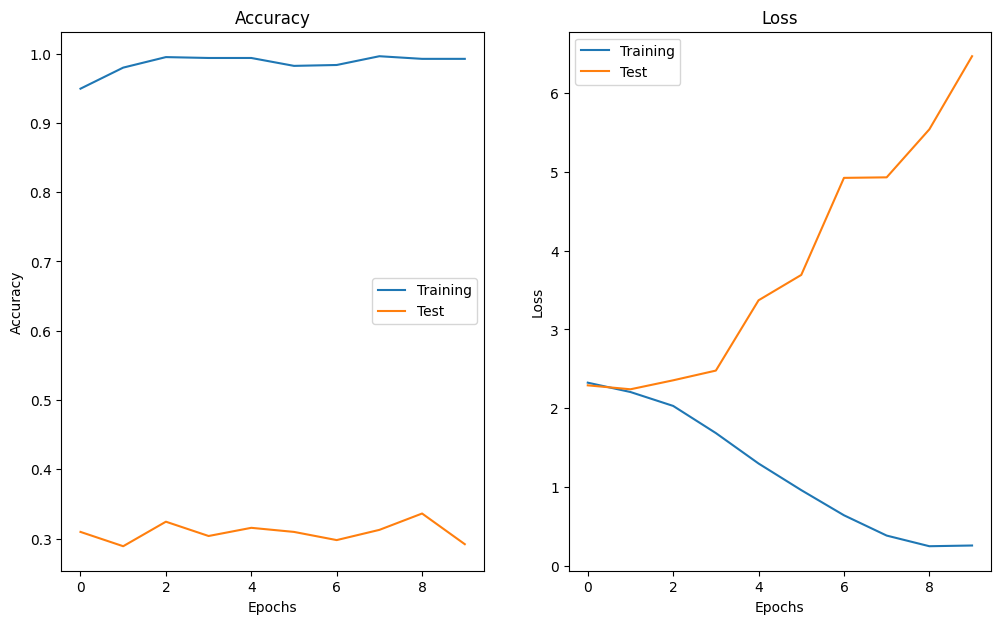

In [ ]:
# Plotting accuracy and loss of data augmented model
plot_model_performance(augmented_history)

> The augmented model did not resolve the overfitting issue. There is still a significant disparity between the high accuracy of the training data and the low accuracy of the test data. Furthermore, it seems that the augmented data could immediatey predict outcomes accurately for the training data but struggled with making predictions on the test set. This is evident from the linear dataset for both the training and test data in the accuracy plot.

# Transfer learning using ResNet50

In [ ]:
# Load the ResNet50 with pre-trained weights from Imagenet, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the model so its weights don't get updated during training
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Preparing dataset

In [ ]:
# Recreate dataset
data_directory = "/content/drive/MyDrive/Bone-Break-Classification"
images, labels = load_data(data_directory)

# Split data into training and test sets for transfe learning(tl)
tl_train_images, tl_test_images, tl_train_labels, tl_test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)

# Normalizing pixel values to be between 0 and 1
tl_train_images, tl_test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Convert categorical labels to numeric values
label_encoder = LabelEncoder()
tl_train_labels_encoded = label_encoder.fit_transform(tl_train_labels)
tl_test_labels_encoded = label_encoder.transform(tl_test_labels)

## Adding custom layers

In [ ]:
# Adding custom layers on top of the base model
custom_layers = [GlobalAveragePooling2D(), Dense(64, activation='relu'), Dense(10, activation='softmax')]

# Build the model
x = base_model.output

# Pass the model's output through the custom layers
for layer in custom_layers:
    x = layer(x)

# Create the final model
transfer_learning_model = Model(inputs=base_model.input, outputs=x)

# Compiling the model
transfer_learning_model.compile(optimizer="Adam", loss=tf.keras.losses.SparseCategoricalCrossentropy, metrics=["accuracy"])

# Summary of the model
transfer_learning_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,719,498 (90.48 MB)

 Trainable params: 131,786 (514.79 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

## Training model

In [ ]:
# Training the model
transfer_learning_model_history = model.fit(tl_train_images, tl_train_labels_encoded, batch_size=32, epochs=10, validation_data=(tl_test_images, tl_test_labels_encoded), shuffle=True)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.1457 - loss: 3.2552 - val_accuracy: 0.1504 - val_loss: 2.2877
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.1225 - loss: 2.2772 - val_accuracy: 0.1298 - val_loss: 2.3063
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.1416 - loss: 2.2769 - val_accuracy: 0.1504 - val_loss: 2.2990
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.1327 - loss: 2.2689 - val_accuracy: 0.1298 - val_loss: 2.3006
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.1443 - loss: 2.2732 - val_accuracy: 0.1504 - val_loss: 2.2957
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.1140 - loss: 2.2842 - val_accuracy: 0.1504 - val_loss: 2.2957
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.1341 - loss: 2.2777 - val_accuracy: 0.1504 - val_loss: 2.2962
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.1354 - loss: 2.2829 - val_accuracy: 0.1298 - val_los

## Model Performance

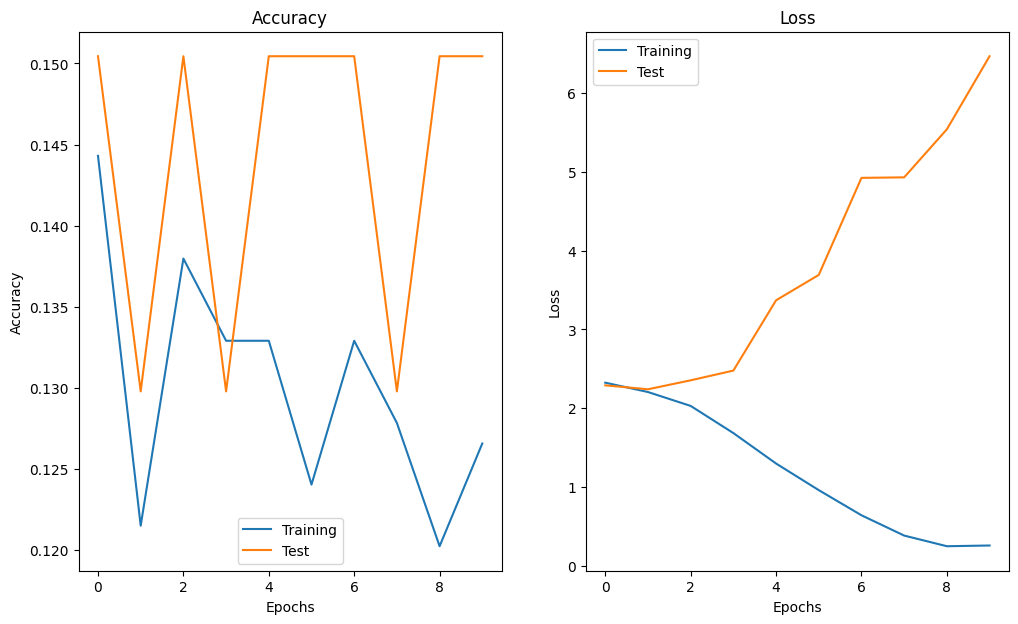

In [ ]:
# Plotting accuracy and loss for trasnfer learning model
plot_model_performance(transfer_learning_model_history)

While the ResNet50 model has fixed the overfitting problem, accuracy value are still low.

# Conclusion

* The baseline and augmented models experienced overfitting issues, performing very well on the training data but failing to predict the test set accurately. The baseline model displayed a consistent learning rate, illustrated by the exponential graph in the accuracy plot for the training data. The test data followed a similar pattern until the 35% mark, after which the curve became more linear. In contrast with the augmented model's accuracy plot which showed a linear graph for both the training and test data.

* Implementing Resnet50 as a transfer learning model resolved the overfitting problem but led to lower accuracy values.

# Recommendations

To potentially increase accuracy and reduce loss, consider the following solutions:
  * Check for dataset imbalance, which could lead to poor model performance.
  * Explore methods beyond data augmentation to prevent overfitting, such as incorporating Dropout layers, Early stopping, and L2 regularization.